# Theoretical

---



# Q1. What is a Decision Tree, and how does it work?

# 🌳 Decision Tree - Explained

A **Decision Tree** is a supervised machine learning algorithm used for both **classification** and **regression** tasks. It works by learning decision rules inferred from data features.

---

## 📌 Key Concepts

- **Root Node**: The topmost node representing the entire dataset, which gets split.
- **Decision Nodes**: Nodes where the dataset is split based on a feature.
- **Leaf Nodes (Terminal Nodes)**: Nodes that contain the final output class or value.
- **Branches**: Arrows connecting nodes, showing the flow of decision logic.

---

## 🧠 How Does It Work?

1. **Start at the root node**.
2. **Select the best feature** to split the data using a criterion (like Gini Index or Information Gain).
3. **Split the dataset** into subsets based on that feature.
4. **Repeat the process** recursively for each subset until:
   - All data points belong to the same class, or
   - Maximum depth is reached, or
   - No more features are available.

---

## ⚙️ Common Splitting Criteria

- **Gini Impurity**: Measures the probability of misclassification.
- **Entropy / Information Gain**: Measures the information gained from a split.

---

## 📈 Example (Classification)

```python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create model
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


# Q2. What are impurity measures in Decision Trees?

# 🧮 Impurity Measures in Decision Trees

In Decision Trees, **impurity measures** are used to determine how "mixed" the classes are in a node. The goal of a split is to reduce impurity — i.e., make child nodes more "pure" (containing mostly one class).

---

## 🎯 Why Use Impurity Measures?

When building a tree, the algorithm evaluates potential splits using impurity measures to choose the feature and threshold that **best separates the data**.

---

## 📊 Common Impurity Measures

### 1. **Gini Impurity**

- Measures the likelihood of an incorrect classification of a randomly chosen element.
- Formula:
  \[
  Gini = 1 - \sum_{i=1}^{C} p_i^2
  \]
  Where \( p_i \) is the probability of class \( i \) in a node.

- **Range**: 0 (pure) to ~0.5 (impure for binary classification)

---

### 2. **Entropy (Information Gain)**

- Measures the level of disorder or unpredictability.
- Formula:
  \[
  Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)
  \]

- A node with only one class has entropy = 0.
- **Information Gain** = Entropy(Parent) - Weighted Average(Entropy of Children)

---

### 3. **Classification Error (Less Common)**

- Simpler but less sensitive to changes in class distribution.
- Formula:
  \[
  Error = 1 - \max(p_i)
  \]

---

## 📌 Comparison

| Criterion             | Formula                        | Best for             | Range       |
|----------------------|--------------------------------|----------------------|-------------|
| Gini Impurity         | \(1 - \sum p_i^2\)             | CART (default in `sklearn`) | 0 to 0.5    |
| Entropy               | \(-\sum p_i \log_2(p_i)\)      | ID3 Algorithm        | 0 to 1      |
| Classification Error  | \(1 - \max(p_i)\)              | Rarely used          | 0 to 1      |

---

## 💡 Example in Code

```python
from sklearn.tree import DecisionTreeClassifier

# Gini (default)
clf_gini = DecisionTreeClassifier(criterion='gini')

# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')


# Q3. What is the mathematical formula for Gini Impurity?

# 🧮 Gini Impurity - Mathematical Formula

Gini Impurity is a measure of how often a randomly chosen element would be incorrectly classified if it was randomly labeled according to the distribution of labels in the node.

---

## 📌 Formula

\[
Gini(p) = 1 - \sum_{i=1}^{C} p_i^2
\]

Where:
- \( C \) = Number of classes
- \( p_i \) = Proportion of samples belonging to class \( i \) at a given node

---

## 📘 Example

If a node contains:
- 4 samples of Class A
- 6 samples of Class B

Then:
- \( p_A = \frac{4}{10} = 0.4 \)
- \( p_B = \frac{6}{10} = 0.6 \)

\[
Gini = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48
\]

---

## 🎯 Interpretation

- **Gini = 0** → Perfectly pure (all elements belong to one class)
- **Higher Gini** → More mixed classes

---

> 📝 **Note**: Gini is used by default in CART (Classification and Regression Tree) algorithms, such as `sklearn.tree.DecisionTreeClassifier`.


# Q4. What is the mathematical formula for Entropy?

# 🔢 Entropy - Mathematical Formula

**Entropy** is a measure of impurity or disorder in a set. In decision trees, it quantifies the uncertainty in the data at a node.

---

## 📌 Formula

\[
Entropy(p) = - \sum_{i=1}^{C} p_i \log_2(p_i)
\]

Where:
- \( C \) = Number of classes
- \( p_i \) = Proportion of instances belonging to class \( i \)
- The base of the logarithm is **2** because we measure entropy in **bits**

---

## 📘 Example

If a node contains:
- 5 samples of Class A
- 5 samples of Class B

Then:
- \( p_A = 0.5 \), \( p_B = 0.5 \)

\[
Entropy = - (0.5 \log_2(0.5) + 0.5 \log_2(0.5)) \\
= - (0.5 \times -1 + 0.5 \times -1) = 1.0
\]

👉 This is **maximum entropy** (maximum disorder)

---

## 🧠 Interpretation

- **Entropy = 0** → Pure node (all samples belong to one class)
- **Higher Entropy** → More mixed or uncertain distribution

---

> 📝 **Note**: Entropy is used in the ID3 algorithm and is often compared with **Gini Impurity**. Both aim to find the best feature split by reducing impurity.


# Q5.  What is Information Gain, and how is it used in Decision Trees?

# 💡 Information Gain in Decision Trees

**Information Gain (IG)** is a key concept used to decide **which feature to split on** at each step in building a decision tree. It measures the **reduction in entropy** after a dataset is split on an attribute.

---

## 📌 Definition

Information Gain is the **difference between the entropy of the parent node** and the **weighted average entropy of child nodes**.

---

## 🧮 Formula

\[
IG(D, A) = Entropy(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} \cdot Entropy(D_v)
\]

Where:
- \( D \) = Dataset
- \( A \) = Feature/attribute
- \( Values(A) \) = Unique values of feature \( A \)
- \( D_v \) = Subset of \( D \) where feature \( A \) has value \( v \)
- \( |D| \) = Total number of instances in the dataset
- \( |D_v| \) = Number of instances in subset \( D_v \)

---

## 🧠 How It's Used in Decision Trees

1. At each node, calculate the **Information Gain** for all features.
2. Select the feature that gives the **highest Information Gain**.
3. Split the node using that feature.
4. Repeat recursively for the child nodes.

---

## 📘 Example

Imagine you have a dataset \( D \) with two features: "Weather" and "Play Tennis".

- Total Entropy (before split): 0.94
- After splitting on "Weather":
  - Subset 1 (Sunny): Entropy = 0.97, size = 5
  - Subset 2 (Rainy): Entropy = 0.86, size = 9

\[
IG(Weather) = 0.94 - \left( \frac{5}{14} \cdot 0.97 + \frac{9}{14} \cdot 0.86 \right) \\
= 0.94 - (0.346 + 0.553) = 0.94 - 0.899 = 0.041
\]

---

## ✅ Interpretation

- **High IG**: Feature provides good separation between classes → useful for splitting
- **Low IG**: Feature does not reduce uncertainty → not useful

---

## 📌 Note

- Information Gain is used in **ID3 algorithm**.
- For continuous features, a threshold is selected that gives the maximum IG.

---

> 🚀 **Tip**: While Information Gain uses entropy, **Gini Impurity** is often preferred in practice for its computational efficiency (used in CART).


# Q6. What is the difference between Gini Impurity and Entropy?

# ⚖️ Gini Impurity vs Entropy in Decision Trees

Both **Gini Impurity** and **Entropy** are impurity measures used to build decision trees. They help determine the best feature to split the dataset at each step by measuring how "pure" or "impure" a node is.

---

## 📌 Key Differences

| Feature               | Gini Impurity                                      | Entropy (Information Gain)                       |
|----------------------|----------------------------------------------------|--------------------------------------------------|
| **Definition**        | Measures the probability of incorrect classification | Measures the amount of information (disorder)     |
| **Formula**           | \( Gini = 1 - \sum p_i^2 \)                        | \( Entropy = - \sum p_i \log_2(p_i) \)           |
| **Used in**           | CART Algorithm (Classification And Regression Trees) | ID3 Algorithm                                    |
| **Range**             | 0 (pure) to 0.5 (for binary classification)        | 0 (pure) to 1 (maximum disorder in binary)       |
| **Computational Cost**| Faster (no logarithms)                            | Slightly slower (uses log base 2)                |
| **Behavior**          | Tends to isolate the most frequent class          | Tends to produce more balanced splits            |

---

## 🧠 Intuition

- **Gini** focuses more on classifying the most frequent class.
- **Entropy** is more sensitive to class distribution and focuses on overall uncertainty.

---

## 📘 Example Comparison

For a binary node with:
- Class A: 4 instances
- Class B: 6 instances

### Gini:
\[
Gini = 1 - (0.4^2 + 0.6^2) = 0.48
\]

### Entropy:
\[
Entropy = - (0.4 \log_2(0.4) + 0.6 \log_2(0.6)) \approx 0.971
\]

---

## 📝 Which One Should You Use?

- **Gini** is faster and is the **default in `scikit-learn`**.
- **Entropy** is more informative for understanding uncertainty.
- In practice, **both often lead to similar trees**.

---

> ✅ **Tip**: Try both for your specific dataset and compare results — performance differences are usually small but can vary depending on data characteristics.


# Q7. What is the mathematical explanation behind Decision Trees?

# 📐 Mathematical Explanation of Decision Trees

A **Decision Tree** is a supervised learning algorithm that builds a **tree-like model** of decisions using **recursive partitioning** of the feature space based on **impurity measures** like Gini or Entropy.

---

## 🧠 Objective

At each node, the algorithm chooses the **best feature and threshold** that results in the **greatest reduction in impurity**.

---

## 🧮 Step-by-Step Mathematical Flow

### 1. **Calculate Node Impurity**

#### For Gini Impurity:
\[
Gini(D) = 1 - \sum_{i=1}^{C} p_i^2
\]

#### For Entropy:
\[
Entropy(D) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\]

Where:
- \( D \) = Current dataset at a node
- \( C \) = Number of classes
- \( p_i \) = Proportion of class \( i \) in \( D \)

---

### 2. **Split the Data on Each Feature**

For each feature \( A \), try all possible thresholds \( t \), and partition the dataset into:

- \( D_{left} = \{x \in D \mid x[A] \leq t\} \)
- \( D_{right} = \{x \in D \mid x[A] > t\} \)

---

### 3. **Calculate Weighted Impurity After Split**

Let:
- \( N \) = Total samples in \( D \)
- \( N_{left} = |D_{left}| \)
- \( N_{right} = |D_{right}| \)

Then:

#### For Gini:
\[
Gini_{split}(A, t) = \frac{N_{left}}{N} \cdot Gini(D_{left}) + \frac{N_{right}}{N} \cdot Gini(D_{right})
\]

#### For Entropy:
\[
Entropy_{split}(A, t) = \frac{N_{left}}{N} \cdot Entropy(D_{left}) + \frac{N_{right}}{N} \cdot Entropy(D_{right})
\]

---

### 4. **Calculate Information Gain (If Using Entropy)**

\[
Information\ Gain = Entropy(D) - Entropy_{split}(A, t)
\]

---

### 5. **Choose the Best Split**

- For Gini: Choose \( (A, t) \) that **minimizes** \( Gini_{split} \)
- For Entropy: Choose \( (A, t) \) that **maximizes** Information Gain

---

### 6. **Recursively Repeat** the Process

- Stop when:
  - All samples belong to the same class (pure node)
  - No more features left
  - A stopping criterion is met (like max depth or min samples)

---

## 📌 Final Prediction

- Classification: Most frequent class in the leaf node
- Regression: Mean or median of the target values in the leaf node

---

## 📘 Summary

| Component         | Math Used                                 |
|------------------|--------------------------------------------|
| Splitting         | Impurity measures (Gini, Entropy)         |
| Evaluation        | Weighted impurity / Information Gain       |
| Decision Making   | Optimal feature and threshold selection    |
| Recursion         | Tree building through divide and conquer  |

---

> 💡 **Tip**: Decision Trees are prone to overfitting. Use **pruning**, **max depth**, or ensemble methods like **Random Forests** to improve generalization.


# Q8. What is Pre-Pruning in Decision Trees?

# ✂️ Pre-Pruning in Decision Trees

**Pre-Pruning** (also called **Early Stopping**) is a technique used to prevent **overfitting** in decision trees by **halting the tree-building process early**—before the tree becomes too complex.

---

## 🎯 Objective

To **control the growth** of the decision tree by applying stopping criteria **before** the tree fully classifies the training data, thus improving **generalization performance**.

---

## 🧮 Common Pre-Pruning Techniques

1. **Maximum Depth (`max_depth`)**
   - Limits how deep the tree can grow.
   - Prevents overfitting to noise in deep branches.

2. **Minimum Samples per Split (`min_samples_split`)**
   - A node must have at least this many samples to be split.
   - Stops splitting on small, potentially noisy subsets.

3. **Minimum Samples per Leaf (`min_samples_leaf`)**
   - Each leaf node must contain at least this many samples.
   - Prevents creation of small leaf nodes with overfitting risk.

4. **Maximum Number of Leaves (`max_leaf_nodes`)**
   - Limits the total number of leaf nodes in the tree.
   - Ensures a simpler and more interpretable tree.

5. **Minimum Impurity Decrease**
   - Splitting continues only if the impurity (e.g., Gini or Entropy) decreases by a minimum amount.

---

## 🧠 Example in Scikit-learn

```python
from sklearn.tree import DecisionTreeClassifier

# Apply pre-pruning
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
clf.fit(X_train, y_train)


# Q9. What is Post-Pruning in Decision Trees?

# 🌳✂️ Post-Pruning in Decision Trees

**Post-Pruning** (also called **Cost Complexity Pruning**) is a technique used to **simplify a fully grown decision tree** by **removing branches that do not provide significant predictive power**.

---

## 🎯 Objective

To reduce **overfitting** and improve **generalization** by trimming parts of the tree that are too specific to the training data.

---

## 🔄 How Post-Pruning Works

1. Grow the tree **fully** (until pure leaf nodes or stopping criteria).
2. Evaluate subtrees or branches using **cross-validation** or **validation data**.
3. **Remove branches** that do not improve the model's accuracy significantly.
4. Replace those branches with **leaf nodes**.

---

## 🧮 Common Post-Pruning Technique

### Cost Complexity Pruning (used in `scikit-learn`)

- Introduces a **penalty term** \( \alpha \) for the complexity (number of leaf nodes):

\[
R_\alpha(T) = R(T) + \alpha \cdot |T|
\]

Where:
- \( R(T) \) = Training error of the tree \( T \)
- \( |T| \) = Number of terminal nodes (leaves)
- \( \alpha \) = Complexity parameter (higher → simpler tree)

---

## 📘 Example in Scikit-learn

```python
from sklearn.tree import DecisionTreeClassifier

# First, train a full tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Use cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train multiple trees with different alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


# Q10. What is the difference between Pre-Pruning and Post-Pruning	?

# ✂️ Pre-Pruning vs Post-Pruning in Decision Trees

Pruning helps prevent **overfitting** in decision trees by controlling tree complexity. There are two main strategies:

---

## 📌 Key Differences

| Feature              | 🟢 Pre-Pruning                         | 🔵 Post-Pruning                          |
|----------------------|----------------------------------------|------------------------------------------|
| **When Applied**      | During tree construction               | After full tree has been built           |
| **Also Known As**     | Early Stopping                         | Cost Complexity Pruning (CART)           |
| **Working Mechanism** | Stops growth based on pre-defined limits | Grows the full tree, then prunes unnecessary branches |
| **Control Parameters**| `max_depth`, `min_samples_split`, etc. | `ccp_alpha` (complexity parameter)       |
| **Risk**              | May underfit if too aggressive         | May overfit before pruning, but generally safer |
| **Computation Cost**  | Lower (tree is smaller)                | Higher (full tree must be built first)   |
| **Flexibility**       | Less flexible — relies on heuristics  | More flexible — uses validation or cost-based metrics |
| **Used In**           | ID3, CART (with parameters)            | CART (`cost_complexity_pruning_path`)    |

---

## 🧠 Intuition

- **Pre-Pruning** prevents the tree from growing too deep by applying constraints early.
- **Post-Pruning** trims back parts of the fully-grown tree that are not statistically significant or add complexity with little gain.

---

## 🧪 Example Use in `scikit-learn`

```python
# Pre-Pruning
DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Post-Pruning
DecisionTreeClassifier(ccp_alpha=0.01)


# Q11.  What is a Decision Tree Regressor	?

# 🌳📈 Decision Tree Regressor

A **Decision Tree Regressor** is a type of decision tree used for **regression tasks**—predicting **continuous numerical values** rather than discrete class labels.

---

## 🎯 Objective

To partition the feature space into regions and assign a **predicted value** (usually the **mean** of the target values in that region) for each leaf node.

---

## 🧮 How It Works

1. The dataset is recursively split based on features that minimize **variance** (instead of classification impurity like Gini/Entropy).
2. At each node, the algorithm chooses the **best split** that minimizes the **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**.
3. The final prediction at a leaf is the **average** of the target values in that leaf.

---

## 🧠 Mathematical Criterion (MSE)

At each node, the algorithm tries to minimize:

\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
\]

Where:
- \( y_i \) = Actual values
- \( \bar{y} \) = Mean of values in the node
- \( n \) = Number of samples in the node

---

## 📘 Example in Scikit-learn

```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generate regression data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=0)

# Train model
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X, y)

# Predict and plot
X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_pred = regressor.predict(X_test)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


# Q12.  What are the advantages and disadvantages of Decision Trees?

# ✅📉 Advantages and Disadvantages of Decision Trees

Decision Trees are popular in machine learning due to their simplicity and interpretability. However, they come with both strengths and limitations.

---

## ✅ Advantages

1. **Easy to Understand and Interpret**
   - Mimics human decision-making with clear rules.

2. **No Need for Feature Scaling**
   - No normalization or standardization required.

3. **Handles Both Numerical and Categorical Data**
   - Can work with mixed types of input features.

4. **Requires Little Data Preprocessing**
   - Handles missing values and irrelevant features reasonably well.

5. **Non-Linear Relationships Captured**
   - Naturally models complex decision boundaries.

6. **Feature Importance**
   - Can measure the relative importance of each feature.

7. **Works with Multi-output Tasks**
   - Can be adapted to predict multiple outputs.

---

## ❌ Disadvantages

1. **Prone to Overfitting**
   - Especially with deep trees or noisy data.

2. **Unstable**
   - Small changes in data can result in a completely different tree.

3. **Biased with Imbalanced Data**
   - Tends to favor classes with more examples.

4. **Greedy Algorithm**
   - Makes locally optimal decisions; may not find the global best tree.

5. **Not Good at Smooth Predictions**
   - Step-like predictions for regression tasks.

6. **Can Be Computationally Expensive**
   - Very large trees take longer to train and may require pruning.

---

## 📌 Tip

> 🎯 Combine Decision Trees with ensemble methods like **Random Forests** or **Gradient Boosting** to mitigate many of these limitations.



# Q13.  How does a Decision Tree handle missing values?

# ❓🌳 How Do Decision Trees Handle Missing Values?

Handling missing data is a common challenge in real-world datasets. **Decision Trees** can manage missing values more flexibly than many other machine learning algorithms.

---

## 🧠 Strategies to Handle Missing Values in Decision Trees

### 1. **Ignore Instances with Missing Values**
- Simplest strategy (used when missing values are few).
- Removes rows with missing data during training.
- ⚠️ Risk of losing useful information.

### 2. **Imputation Before Training**
- Replace missing values with:
  - Mean/Median (for numerical)
  - Mode (for categorical)
- This is done **before fitting the model**, often with `SimpleImputer` in scikit-learn.

```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)


# Q14. How does a Decision Tree handle categorical features?

# 🔤🌳 How Do Decision Trees Handle Categorical Features?

**Decision Trees** are naturally capable of handling both **numerical** and **categorical** features. However, how they do this depends on the implementation (like `scikit-learn`, `XGBoost`, etc.).

---

## 📌 What Are Categorical Features?

- Features with **discrete** values (e.g., "Red", "Green", "Blue")
- Typically **non-numeric**
- Can be **nominal** (no order) or **ordinal** (ordered categories)

---

## 🧠 How Decision Trees Handle Categorical Features

### 1. **Binary Splits (One-vs-Rest)**
- Tree checks if the feature equals a particular category.
- Example:
  - Feature = "Color", Values = {Red, Green, Blue}
  - Split: `Color == Red` → True branch, else → False branch

### 2. **Multiway Splits (Non-binary trees)**
- Each unique category gets its own branch.
- More common in some libraries like `CART`, `C4.5`, or `rpart`.

---

## ⚙️ Handling Categorical Features in Scikit-learn

### ❌ Native Limitation
- `sklearn.tree.DecisionTreeClassifier` **does not support non-numeric categorical features** directly.
- Must convert them using **encoding**:

---

### ✅ Solution: Encode Before Training

### **Label Encoding** (if ordinal)

```python
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['category'] = le.fit_transform(X['category'])


# Q15. What are some real-world applications of Decision Trees?

# 🌍 Real-World Applications of Decision Trees

Decision Trees are widely used in various domains due to their **interpretability**, **low preprocessing**, and ability to handle **both categorical and numerical data**.

---

## 🏦 1. **Finance**

- **Credit Scoring**: Classify applicants as low or high risk.
- **Loan Approval**: Determine eligibility based on income, credit history, etc.
- **Fraud Detection**: Identify suspicious transactions using rule-based splits.

---

## 🏥 2. **Healthcare**

- **Medical Diagnosis**: Classify diseases based on symptoms and patient history.
- **Risk Assessment**: Predict patient readmission or complication risk.
- **Treatment Recommendation**: Suggest treatments based on decision paths.

---

## 🛒 3. **Retail & E-commerce**

- **Customer Segmentation**: Group customers based on purchasing behavior.
- **Churn Prediction**: Identify customers likely to leave the platform.
- **Recommendation Engines**: Suggest products using behavioral patterns.

---

## 🎓 4. **Education**

- **Student Performance Prediction**: Based on attendance, grades, and participation.
- **Dropout Risk Analysis**: Identify students likely to drop out.
- **Adaptive Learning Systems**: Customize content based on student progress.

---

## 🚗 5. **Transportation**

- **Traffic Prediction**: Predict congestion levels based on time, location, and weather.
- **Route Optimization**: Select shortest/safest routes based on traffic patterns.
- **Vehicle Failure Detection**: Classify vehicle component failures.

---

## 🌾 6. **Agriculture**

- **Crop Disease Diagnosis**: Predict plant diseases from images and environmental data.
- **Yield Prediction**: Estimate productivity based on soil, weather, and crop features.
- **Irrigation Management**: Optimize water use using decision models.

---

## 🕵️ 7. **Cybersecurity**

- **Intrusion Detection Systems (IDS)**: Classify network traffic as normal or malicious.
- **Spam Filtering**: Detect spam based on message features.
- **Phishing Detection**: Classify URLs or emails as phishing or safe.

---

## 🗳️ 8. **Government & Public Policy**

- **Policy Impact Analysis**: Predict effects of policy interventions on target groups.
- **Resource Allocation**: Optimize the distribution of welfare schemes.
- **Crime Prediction**: Analyze crime data to predict high-risk areas.

---

> 💡 **Tip**: Decision Trees are easy to interpret, making them ideal for fields where transparency and explainability are critical (e.g., healthcare, finance, law).


# Practical

---



# Q16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy?

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)


Model accuracy: 1.0


# Q17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances?

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)
print("Feature importances:", clf.feature_importances_)


Feature importances: [0.01333333 0.         0.56405596 0.42261071]


# Q18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy?

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)


Model accuracy: 0.9777777777777777


# Q19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)?

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5280096503174904


# Q20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz?

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

iris = load_iris()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(iris.data, iris.target)

dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")
graph.view()


'iris_decision_tree.pdf'

# Q21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree?

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_max_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_full = DecisionTreeClassifier(random_state=42)

clf_max_depth.fit(X_train, y_train)
clf_full.fit(X_train, y_train)

acc_max_depth = accuracy_score(y_test, clf_max_depth.predict(X_test))
acc_full = accuracy_score(y_test, clf_full.predict(X_test))

print("Accuracy with max_depth=3:", acc_max_depth)
print("Accuracy with fully grown tree:", acc_full)


Accuracy with max_depth=3: 1.0
Accuracy with fully grown tree: 1.0


# Q22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree?

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_default = DecisionTreeClassifier(random_state=42)
clf_min_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)

clf_default.fit(X_train, y_train)
clf_min_split.fit(X_train, y_train)

acc_default = accuracy_score(y_test, clf_default.predict(X_test))
acc_min_split = accuracy_score(y_test, clf_min_split.predict(X_test))

print("Default Tree Accuracy:", acc_default)
print("Tree with min_samples_split=5 Accuracy:", acc_min_split)


Default Tree Accuracy: 1.0
Tree with min_samples_split=5 Accuracy: 1.0


# Q23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data?

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
pred_unscaled = clf_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
pred_scaled = clf_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, pred_scaled)

print("Accuracy with unscaled data:", acc_unscaled)
print("Accuracy with scaled data:", acc_scaled)


Accuracy with unscaled data: 1.0
Accuracy with scaled data: 1.0


# Q24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification?

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)
y_pred = ovr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Q25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores?

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
importances = clf.feature_importances_
print("Feature importance scores:")
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")


Feature importance scores:
sepal length (cm): 0.013333333333333329
sepal width (cm): 0.0
petal length (cm): 0.5640559581320451
petal width (cm): 0.4226107085346215


# Q26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree?

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_depth5.fit(X_train, y_train)
y_pred_depth5 = tree_depth5.predict(X_test)
mse_depth5 = mean_squared_error(y_test, y_pred_depth5)

tree_full = DecisionTreeRegressor(random_state=42)
tree_full.fit(X_train, y_train)
y_pred_full = tree_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

print("MSE with max_depth=5:", mse_depth5)
print("MSE with unrestricted tree:", mse_full)


MSE with max_depth=5: 0.5210801561811793
MSE with unrestricted tree: 0.5280096503174904


# Q27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy?

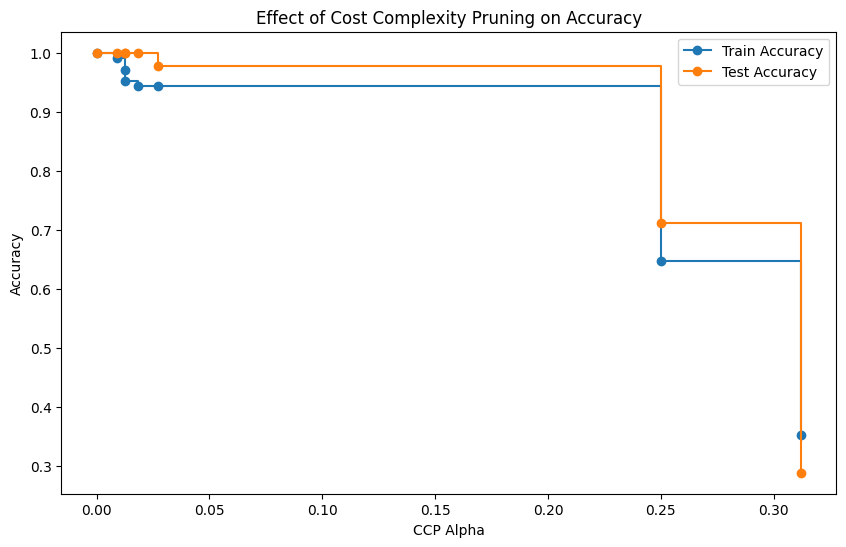

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))
    clfs.append(clf)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.legend()
plt.show()


# Q28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score?

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Q29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn?

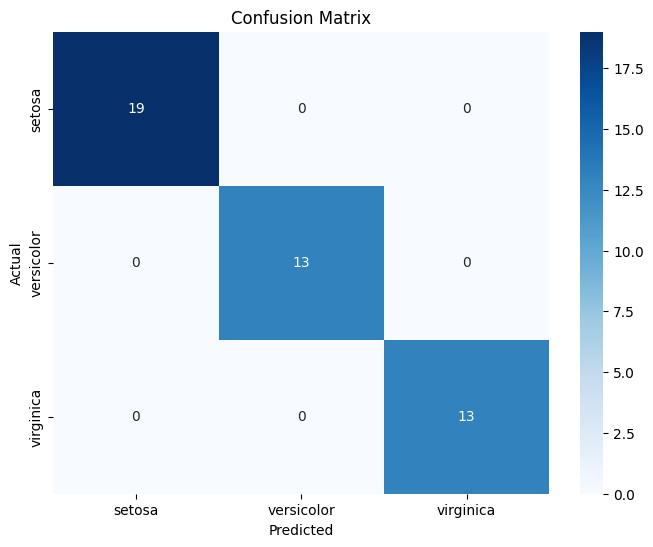

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Q30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5, 6]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test set score:", grid_search.score(X_test, y_test))


Best parameters: {'max_depth': None, 'min_samples_split': 6}
Best cross-validation score: 0.9428571428571428
Test set score: 1.0
